In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

### DATA WRANGLING

!!! Don't execute this section if the file with the City column is already created !!!

In [ ]:
df = pd.read_csv('./data/ec1m_distractor_geotags.txt', sep='\t', header=None, names=['lat','long'])

In [262]:
city = []
for i in range(len(df)):
    if df.lat[i] > 51 and df.lat[i] < 52 and df.long[i] < 0:
        city.append('London')
    elif df.lat[i] > 48 and df.lat[i] < 49 and df.long[i] < 3:
        city.append('Paris')
    elif df.lat[i] > 52 and df.lat[i] < 53 and df.long[i] < 5:
        city.append('Amsterdam')
    elif df.lat[i] > 48 and df.lat[i] < 49 and df.long[i] > 16:
        city.append('Vienna')
    elif df.lat[i] > 45 and df.lat[i] < 46 and df.long[i] > 9:
        city.append('Milan')
    else:
        city.append('Other')

In [281]:
df['City'] = np.nan
df.City = city

In [282]:
BCN = pd.read_csv('./data/ec1m_landmarks_geotags.txt', sep=' ', header=None, names=['lat','long'])
BCN['City'] = 'Barcelona'

In [283]:
df = pd.concat([df, BCN])

In [293]:
df.to_csv("./data/landmarks.gz", index_label=False, compression="gzip")

### LANDMARKS ANALYSIS

In [4]:
df = pd.read_csv('./data/landmarks.gz')

In [38]:
def city_tops(data, city, n=10000, ntop=10, clusters=350):
    
    # Select rows of selected city
    data = data[data.City == city]
    
    # Sample rows of city
    if len(data) < n:
        n = len(data)
        clusters = int(n / 10)
    data = data.sample(n=n)
    
    # Making clusters
    X = np.array([data.lat, data.long]).T
    cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')
    data['Cluster'] = cluster.fit_predict(X)
    
    # Selection of Top-Clusters
    top = list(data.Cluster.value_counts()[:ntop].index)
    
    # Layers selected and not selected
    show = data[data.Cluster.apply(lambda x: x in top)]
    hide = data[data.Cluster.apply(lambda x: x not in top)]
    
    #plt.figure(figsize=(14,8))
    #plt.scatter(hide.long, hide.lat, c='grey', s=1, alpha=0.6)
    #plt.scatter(show.long, show.lat, c=show.Cluster, s=1, alpha=0.5, cmap = 'hsv')
    #plt.show
    
    final = show[['lat','long','Cluster']].groupby('Cluster').mean().reset_index().drop('Cluster', axis=1)
    
    final['City'] = city
    return(final)

In [24]:
np.unique(df.City)

array(['Amsterdam', 'Barcelona', 'London', 'Milan', 'Other', 'Paris',
       'Vienna'], dtype=object)

In [40]:
city_tops(df, 'London', ntop=5, clusters=300)

,lat,long,City
0,51.500756,-0.124217,London
1,51.507910,-0.076200,London
2,51.507975,-0.128110,London
3,51.507969,-0.099230,London
4,51.503414,-0.119395,London


,lat,long,City
0,41.394923,2.161678,Barcelona
1,41.403617,2.174303,Barcelona
2,41.413768,2.152761,Barcelona
3,41.391641,2.164963,Barcelona
4,41.391432,2.180146,Barcelona
5,41.395278,2.161743,Barcelona
6,41.413520,2.153035,Barcelona
7,41.404004,2.174844,Barcelona
8,41.390954,2.180716,Barcelona
9,41.375855,2.177733,Barcelona


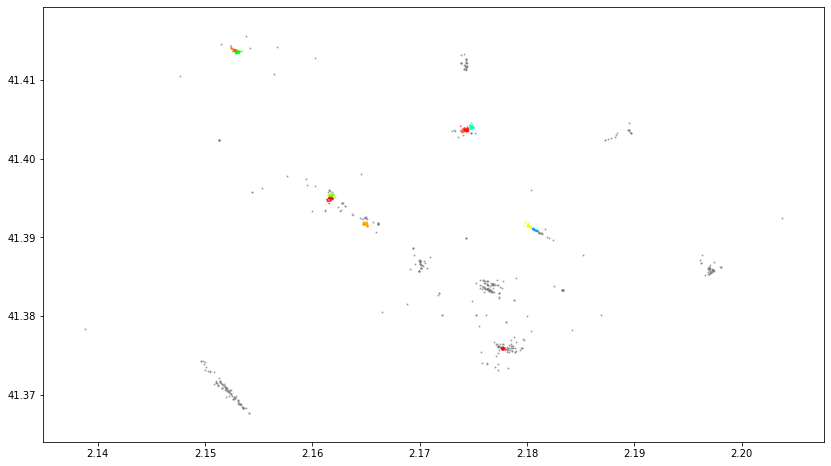

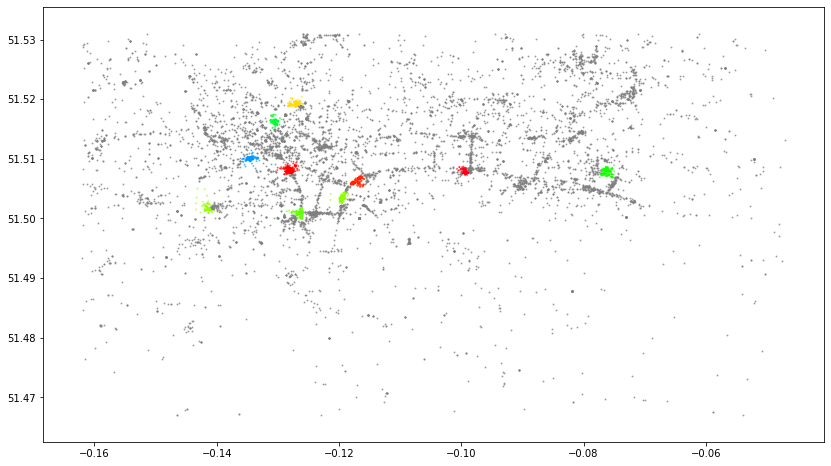

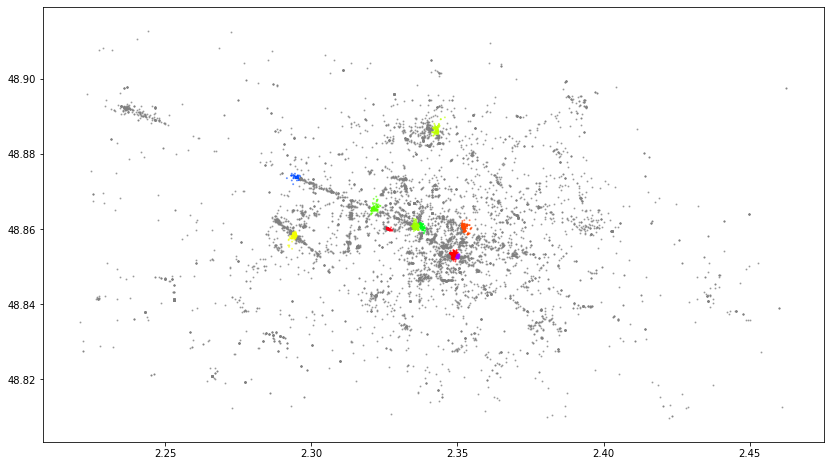

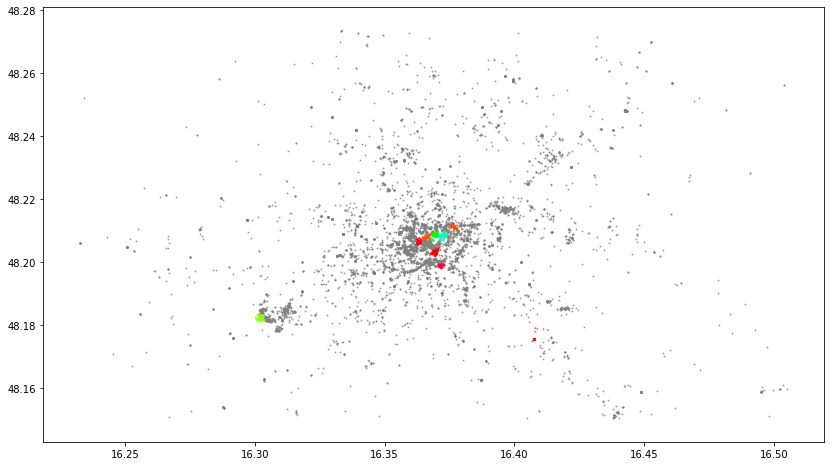

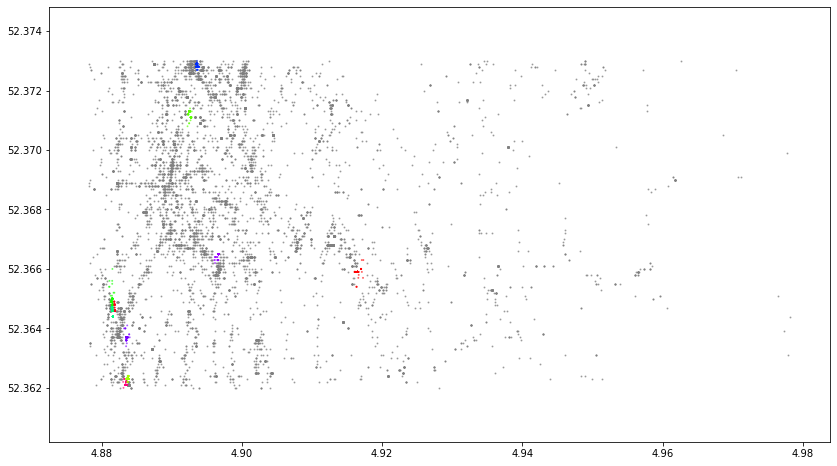

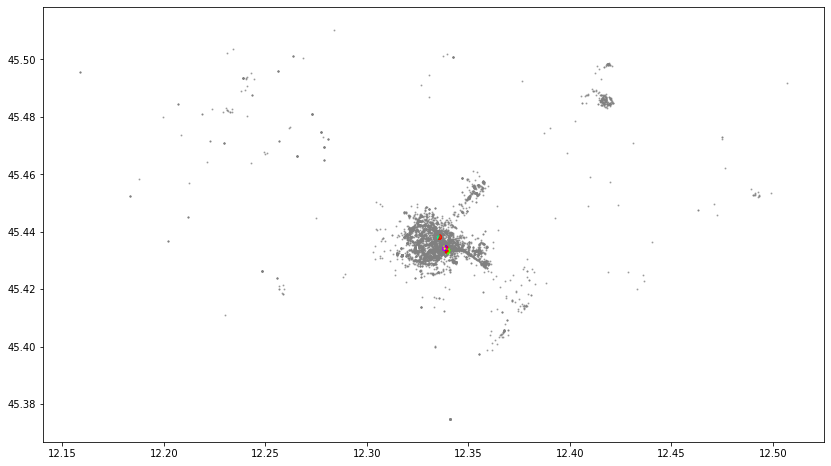

In [33]:
landmarks = None
for i in ['Barcelona', 'London', 'Paris', 'Vienna', 'Amsterdam', 'Milan']:
    current = city_tops(df, i)
    landmarks = pd.concat([landmarks, current])
    
landmarks

In [8]:
city = df[df.City=='London']
city.head(3)

,lat,long,City
534,51.5110,-0.098608,London
551,51.5146,-0.071824,London
575,51.5007,-0.127628,London


<function matplotlib.pyplot.show(*args, **kw)>

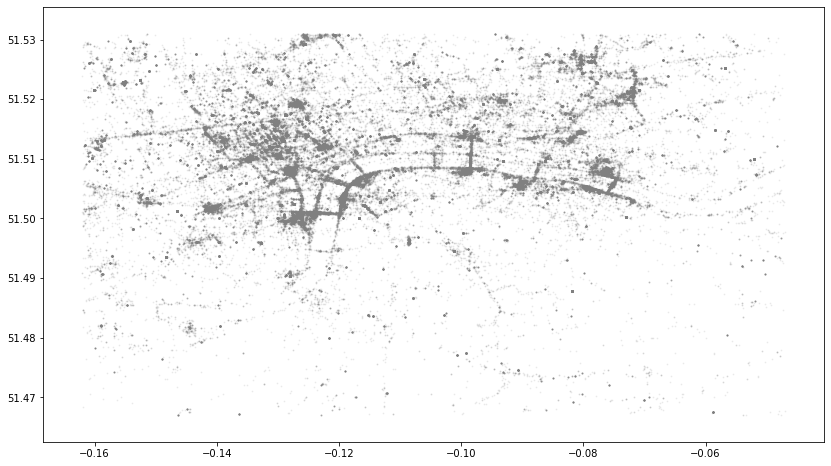

In [15]:
plt.figure(figsize=(14,8))
plt.scatter(city.long, city.lat, c='grey', s=1, alpha=0.1)
plt.show